# Labolatorium 1:  Analiza Danych - Dataframes
Jakub Fabia

## Importowanie bibliotek
Importuję niezbędne biblioteki. Biblioteki te obejmują:
- `CSV` do pracy z plikami CSV,
- `DataFrames` do manipulacji danymi w formie tabelarycznej,
- `Plots` do tworzenia wykresów,
- `Statistics` do obliczeń statystycznych,
- `LinearAlgebra` do operacji na macierzach i wektorach.

In [1]:
using CSV
using DataFrames
using Plots
using Statistics
using LinearAlgebra

## Funkcje obliczeniowe

Funkcja `generalized_dot` oblicza uogólniony iloczyn skalarny dwóch wektorów `x` i `y` oraz macierzy `A`. 

Funkcja `matrix_vector_product` oblicza iloczyn wektora `x` oraz macierzy `A`.

In [2]:
function generalized_dot(x::Vector, A::Matrix, y::Vector)
    return dot(x, A * y)
end

generalized_dot (generic function with 1 method)

In [3]:
function matrix_vector_product(A::Matrix, x::Vector)
    return A * x
end

matrix_vector_product (generic function with 1 method)

## Funkcja mierząca czas obliczania
Funkcja `benchmark_functions` przeprowadza testy wydajnościowe dla funkcji `generalized_dot` oraz `matrix_vector_product`. <br>
Dla różnych rozmiarów macierzy i wektorów (`sizes`) oraz określonej liczby prób (`num_trials`), funkcja generuje losowe macierze `A` oraz wektory `x` i `y`. <br>
Następnie mierzy czas wykonania obu funkcji dla tych danych. Wyniki są zapisywane do pliku CSV o nazwie `pomiary.csv`. <br>
Pierwsza próba dla każdego rozmiaru jest pomijana, ponieważ mierzy także czas kompilacji.

In [4]:
function benchmark_functions(sizes, num_trials)
    open("pomiary.csv", "w") do file
        CSV.write(file, [], writeheader=true, header=["size", "sample", "time_dot", "time_matrix_vector"])
        for n in sizes
            for i in 0:num_trials
                
                A = rand(n, n)
                x = rand(n)
                y = rand(n)
                
                time_dot = @elapsed generalized_dot(x, A, y);
                time_matrix_vector = @elapsed matrix_vector_product(A, x);
                
                # Skip the first sample, as it measures the compilation time
                if i != 0
                    CSV.write(file, [(n, i, time_dot, time_matrix_vector)], append=true)
                end
            end
        end
    end
end

benchmark_functions (generic function with 1 method)

### Utworzenie pomiarów

In [5]:
sizes = 400:200:2000
num_trials = 10
benchmark_functions(sizes, num_trials)

## Analiza danych
Wczytuję dane z pliku CSV do DataFrame'a.

In [6]:
input = "pomiary.csv"
df = CSV.read(input, delim=",", DataFrame)

Row,size,sample,time_dot,time_matrix_vector
,Int64,Int64,Float64,Float64
1,400,1,2.3816e-5,2.4526e-5
2,400,2,3.9151e-5,2.6415e-5
3,400,3,2.719e-5,2.3423e-5
4,400,4,2.8528e-5,2.3125e-5
5,400,5,2.8188e-5,2.2659e-5
6,400,6,3.2199e-5,2.2468e-5
7,400,7,2.9631e-5,6.7849e-5
8,400,8,2.648e-5,2.2192e-5
9,400,9,2.4686e-5,2.1725e-5


Dla każdego rozmiaru wektorów obliczam średnią oraz odchylenie standardowe dla pomiarów obu funkcji.

In [7]:
plot_df = combine(
    groupby(df, :"size"), 
    "time_dot" => mean, 
    "time_dot" => std, 
    "time_matrix_vector" => mean, 
    "time_matrix_vector" => std
)

Row,size,time_dot_mean,time_dot_std,time_matrix_vector_mean,time_matrix_vector_std
,Int64,Float64,Float64,Float64,Float64
1,400,2.85754e-5,4.44182e-6,2.86624e-5,1.41149e-5
2,600,5.75059e-5,1.8293e-5,4.52238e-5,1.37364e-5
3,800,9.24064e-5,1.29667e-5,7.23874e-5,2.66525e-5
4,1000,0.000192283,2.40723e-5,0.000144461,3.13032e-5
5,1200,0.000272228,6.74549e-5,0.000157844,2.63932e-5
6,1400,0.000488365,5.97138e-5,0.000300192,2.76742e-5
7,1600,0.00072716,4.6571e-5,0.000394811,3.44203e-5
8,1800,0.000984828,3.09295e-5,0.000601442,3.34425e-5
9,2000,0.00123884,4.16904e-5,0.000855694,4.55996e-5


## Wykresy

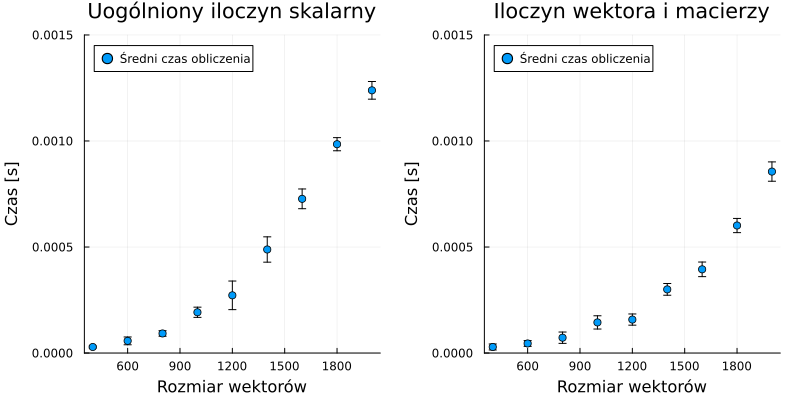

In [8]:
p1 = scatter(
    plot_df.size, 
    plot_df.time_dot_mean, 
    yerr = plot_df.time_dot_std, 
    label = "Średni czas obliczenia", 
    xlabel = "Rozmiar wektorów", 
    ylabel = "Czas [s]", 
    title = "Uogólniony iloczyn skalarny", 
    legend = :topleft, 
    margin = 3Plots.mm,
    ylims = (0, 0.0015)
)
p2 = scatter(
    plot_df.size, 
    plot_df.time_matrix_vector_mean, 
    yerr = plot_df.time_matrix_vector_std, 
    label = "Średni czas obliczenia", 
    xlabel = "Rozmiar wektorów", 
    ylabel = "Czas [s]", 
    title = "Iloczyn wektora i macierzy", 
    legend = :topleft,
    margin = 3Plots.mm,
    ylims = (0, 0.0015)
)

plot(p1, p2, layout = (1, 2), size = (800, 400))